In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
import sys
sys.path.append("../Models")
from utilities import *
sys.path.append("../Models/Linear_Regression")
from lin_reg import *

In [4]:
# Store the initial directory when you start the notebook
initial_directory = os.getcwd()

# Create a function to reset to the initial directory
def reset_to_initial_directory():
    os.chdir(initial_directory)

In [5]:
reset_to_initial_directory()

In [6]:
current_path = os.getcwd()
print("Current Path:", current_path)

Current Path: /Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Stack


In [7]:
reset_to_initial_directory()
%cd "../Models/KNN"
%run KNN.ipynb
knn_a_valid_pred = knn_a_cross_val_predictions
knn_b_valid_pred = knn_b_cross_val_predictions
knn_c_valid_pred = knn_c_cross_val_predictions
y_valid_a = knn_a_cross_val_actuals
y_valid_b = knn_b_cross_val_actuals
y_valid_c = knn_c_cross_val_actuals
knn_a_test = knn_a_test_pred 
knn_b_test = knn_b_test_pred 
knn_c_test = knn_c_test_pred 
reset_to_initial_directory()

/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/KNN
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
reset_to_initial_directory()
%cd "../Models/RF"
%run Random_Forest.ipynb
rf_a_valid_pred = rf_a_cross_val_predictions
rf_b_valid_pred = rf_b_cross_val_predictions
rf_c_valid_pred = rf_c_cross_val_predictions
rf_a_test = rf_a_test_pred
rf_b_test = rf_b_test_pred
rf_c_test = rf_c_test_pred
reset_to_initial_directory()

/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/RF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/XGB
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


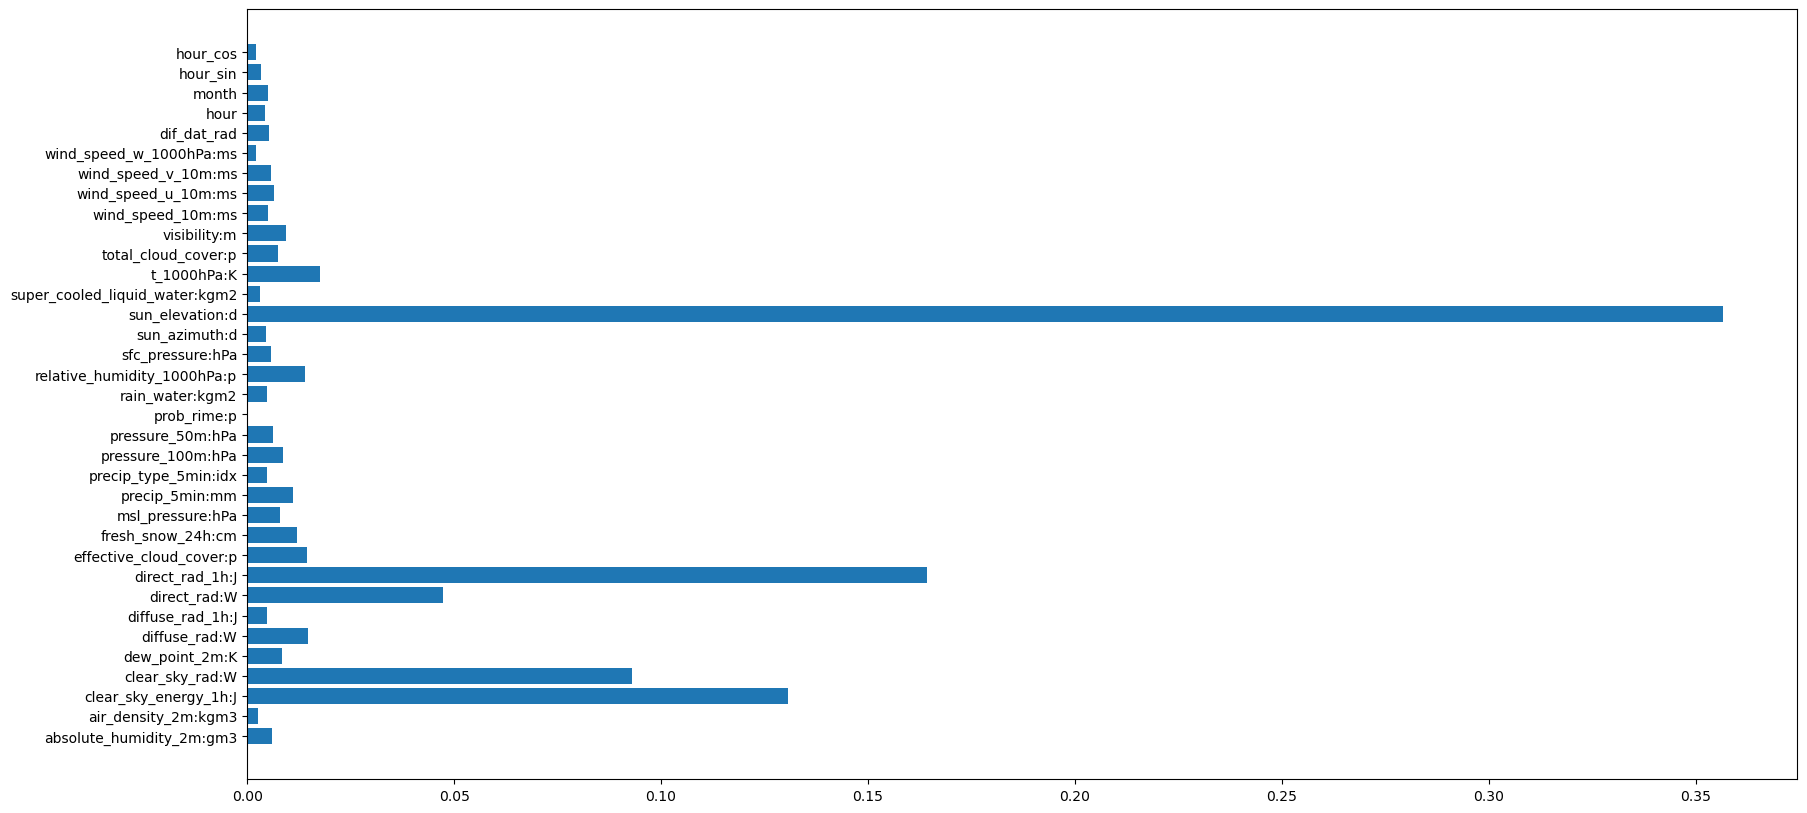

In [9]:
reset_to_initial_directory()
%cd "../Models/XGB"
%run XGBoost.ipynb
xgb_a_valid_pred = xgb_a_cross_val_predictions
xgb_b_valid_pred = xgb_b_cross_val_predictions
xgb_c_valid_pred = xgb_c_cross_val_predictions
xgb_a_test = xgb_a_test_pred
xgb_b_test = xgb_b_test_pred
xgb_c_test = xgb_c_test_pred
reset_to_initial_directory()

In [10]:
X_train_a = pd.DataFrame({"KNN" : knn_a_valid_pred, "RF" : rf_a_valid_pred, "XGB" : xgb_a_valid_pred})
X_train_b = pd.DataFrame({"KNN" : knn_b_valid_pred, "RF" : rf_b_valid_pred, "XGB" : xgb_b_valid_pred})
X_train_c = pd.DataFrame({"KNN" : knn_c_valid_pred, "RF" : rf_c_valid_pred, "XGB" : xgb_c_valid_pred})

In [11]:
X_test_a = pd.DataFrame({"KNN" : knn_a_test, "RF" : rf_a_test, "XGB" : xgb_a_test})
X_test_b = pd.DataFrame({"KNN" : knn_b_test, "RF" : rf_b_test, "XGB" : xgb_b_test})
X_test_c = pd.DataFrame({"KNN" : knn_c_test, "RF" : rf_c_test, "XGB" : xgb_c_test})

In [12]:
y_train_a = pd.DataFrame({"pv_measurement" : y_valid_a})
y_train_b = pd.DataFrame({"pv_measurement" : y_valid_b})
y_train_c = pd.DataFrame({"pv_measurement" : y_valid_c})

In [13]:
meta_model_a = Lin_reg(X_train_a, X_test_a, y_train_a)
meta_model_b = Lin_reg(X_train_b, X_test_b, y_train_b)
meta_model_c = Lin_reg(X_train_c, X_test_c, y_train_c)

In [14]:
meta_model_a.cross_validate(X_train_a, y_train_a)
meta_model_b.cross_validate(X_train_b, y_train_b)
meta_model_c.cross_validate(X_train_c, y_train_c)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [252.79550671 250.84820252 233.46944256 242.35625832 245.63486255]
Mean cross-validation score: 245.0208545308248
Cross-validation scores: [41.25481582 43.14783362 42.86829417 42.27803808 42.8033022 ]
Mean cross-validation score: 42.470456776592016
Cross-validation scores: [33.17229297 34.92970458 35.0455159  34.5743663  34.15675165]
Mean cross-validation score: 34.37572628233299


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

In [15]:
meta_model_a.fit()
meta_model_a.pred()
meta_model_a_pred = meta_model_a.prediction

In [16]:
meta_model_b.fit()
meta_model_b.pred()
meta_model_b_pred = meta_model_b.prediction

In [17]:
meta_model_c.fit()
meta_model_c.pred()
meta_model_c_pred = meta_model_c.prediction

In [18]:
y_new_pred = np.concatenate((meta_model_a_pred, meta_model_b_pred, meta_model_c_pred), axis = 0)

In [19]:
submission("stack_lin_reg_march_sept_less_features.csv", y_new_pred, "../")